In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore the data

In [ ]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [6]:
print(train_df.describe())
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

## missing values

In [7]:
print(train_df.isna().sum())
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Check duplicates

In [8]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


## Data Preprocessing

In [9]:
for col in train_df.columns:
    print("Missing values")
    missing_values = train_df[col].isna().sum()
    percentage = (missing_values/len(train_df)) * 100
    print(f"{col}: {missing_values} ({percentage:.2f}%)")

Missing values
PassengerId: 0 (0.00%)
Missing values
Survived: 0 (0.00%)
Missing values
Pclass: 0 (0.00%)
Missing values
Name: 0 (0.00%)
Missing values
Sex: 0 (0.00%)
Missing values
Age: 177 (19.87%)
Missing values
SibSp: 0 (0.00%)
Missing values
Parch: 0 (0.00%)
Missing values
Ticket: 0 (0.00%)
Missing values
Fare: 0 (0.00%)
Missing values
Cabin: 687 (77.10%)
Missing values
Embarked: 2 (0.22%)


In [10]:
for col in test_df.columns:
    print("Missing values")
    missing_values = test_df[col].isna().sum()
    percentage = (missing_values/len(test_df)) * 100
    print(f"{col}: {missing_values} ({percentage:.2f}%)")

Missing values
PassengerId: 0 (0.00%)
Missing values
Pclass: 0 (0.00%)
Missing values
Name: 0 (0.00%)
Missing values
Sex: 0 (0.00%)
Missing values
Age: 86 (20.57%)
Missing values
SibSp: 0 (0.00%)
Missing values
Parch: 0 (0.00%)
Missing values
Ticket: 0 (0.00%)
Missing values
Fare: 1 (0.24%)
Missing values
Cabin: 327 (78.23%)
Missing values
Embarked: 0 (0.00%)


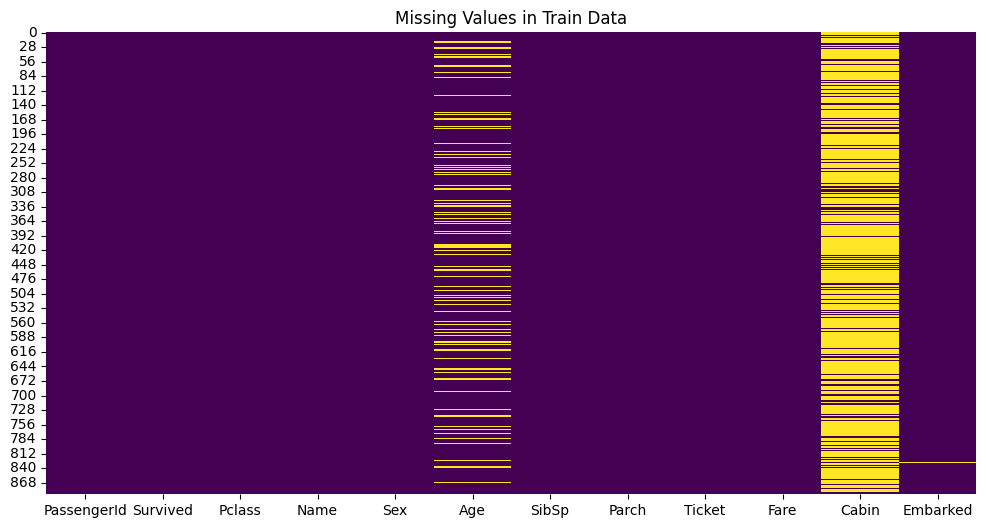

In [11]:
# Plotting missing values in train data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Data')
plt.show()


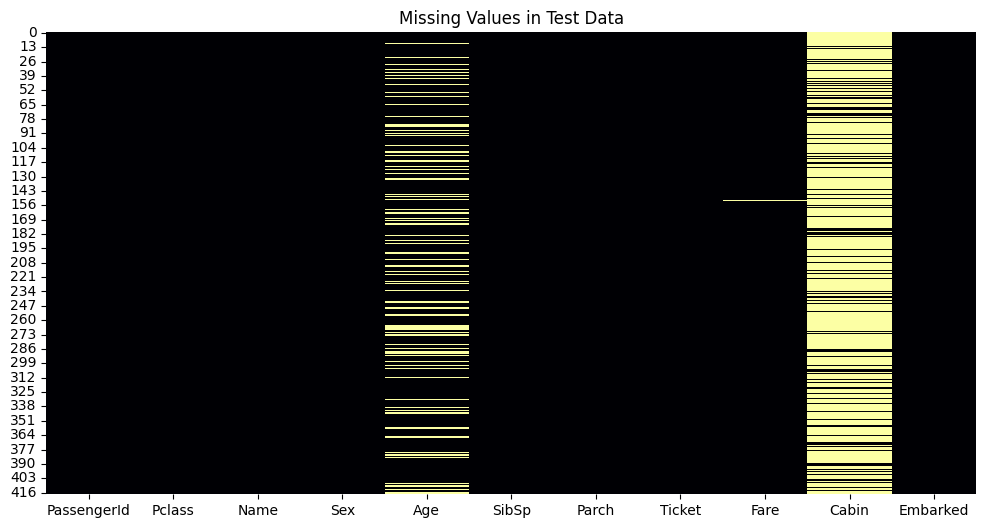

In [12]:
# Plotting missing values in test data
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='inferno')
plt.title('Missing Values in Test Data')
plt.show()

In [13]:
# We're removing the cabin column as 77% of the data is na
# and it won't help us in our analysis
train_df.drop(columns='Cabin',inplace=True)
test_df.drop(columns='Cabin',inplace=True)


In [14]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
test_df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

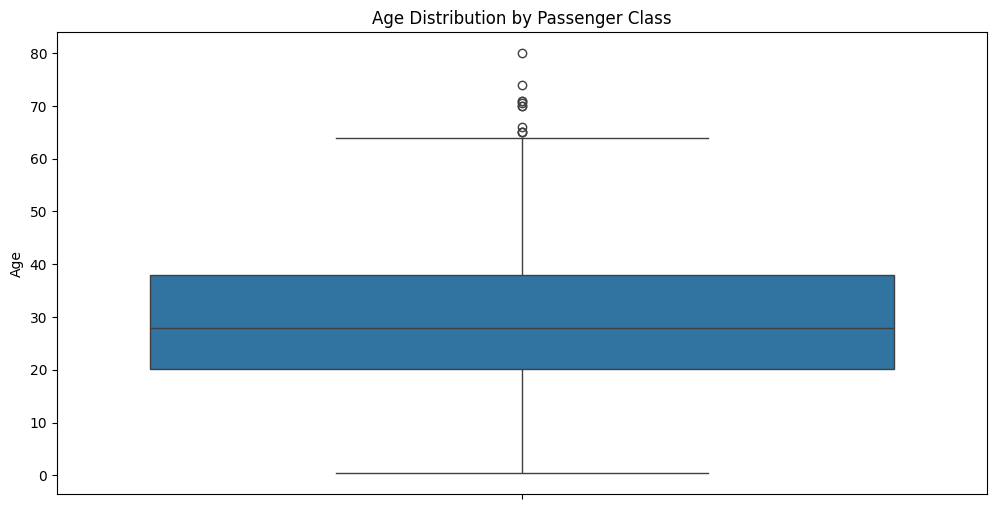

In [16]:
#plot Age distribution in train data
plt.figure(figsize=(12, 6))
sns.boxplot(y='Age', data=train_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

-- Observations :
We can clearly see that their are outliers beyond the upper whisker so we need to handle them.
We now replace the null values with median and visualise again


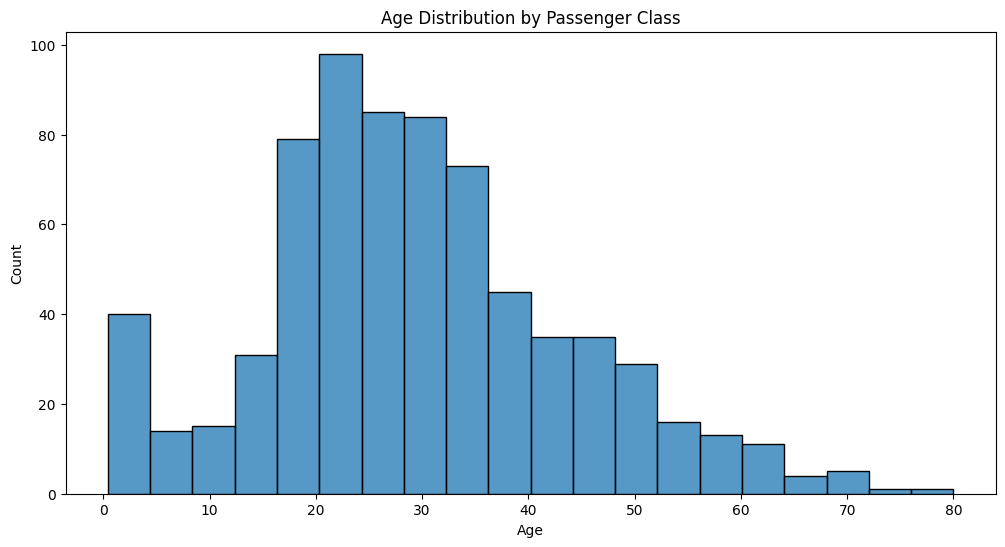

In [17]:
#plot Age distribution in train data
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=train_df)
plt.title('Age Distribution by Passenger Class')
plt.show()

In [18]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [19]:
train_df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

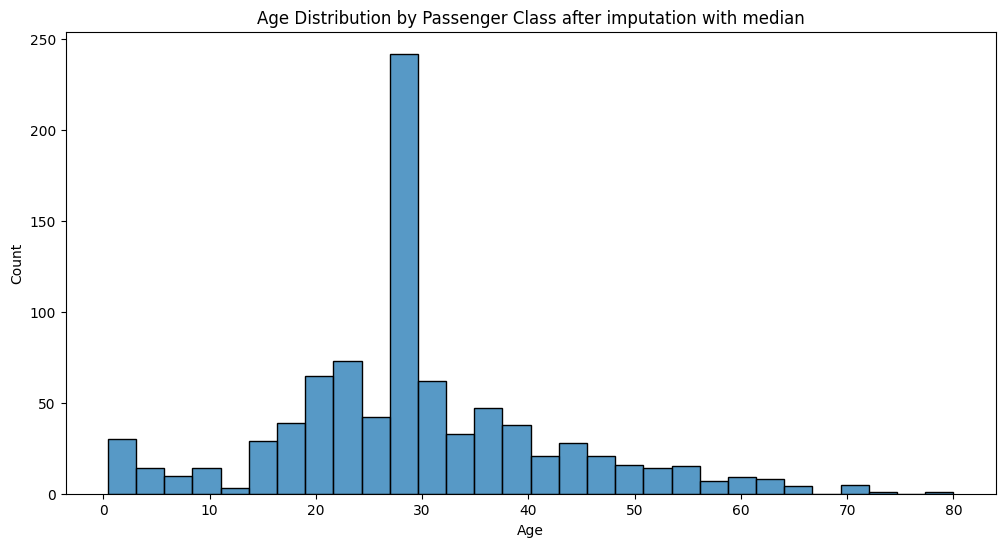

In [20]:
#plot Age distribution in train data after imputation
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=train_df)
plt.title('Age Distribution by Passenger Class after imputation with median' )
plt.show()

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

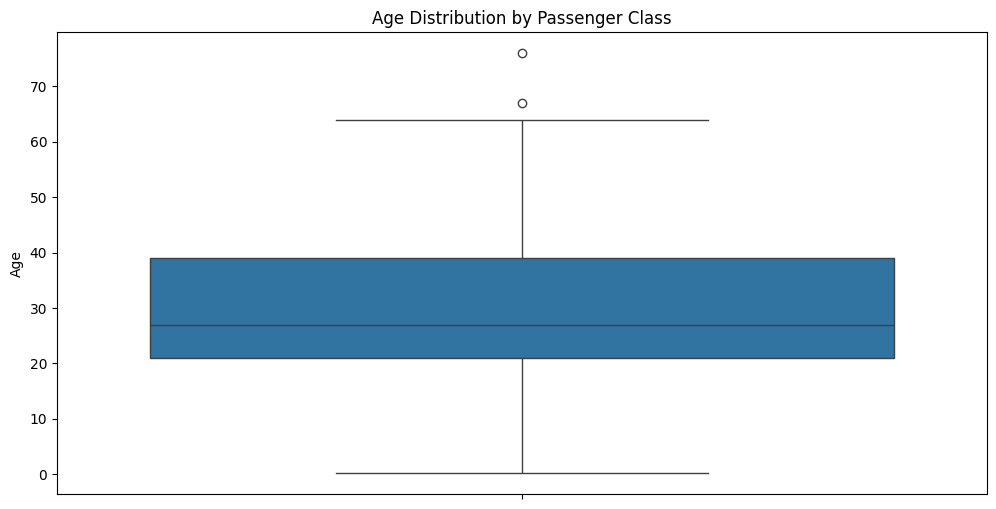

In [21]:
#plot Age distribution in test data
plt.figure(figsize=(12, 6))
sns.boxplot(y='Age', data=test_df)
plt.title('Age Distribution by Passenger Class' )

In [22]:
# Similarly we perform the same operation for the test data
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Age'].describe()


count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

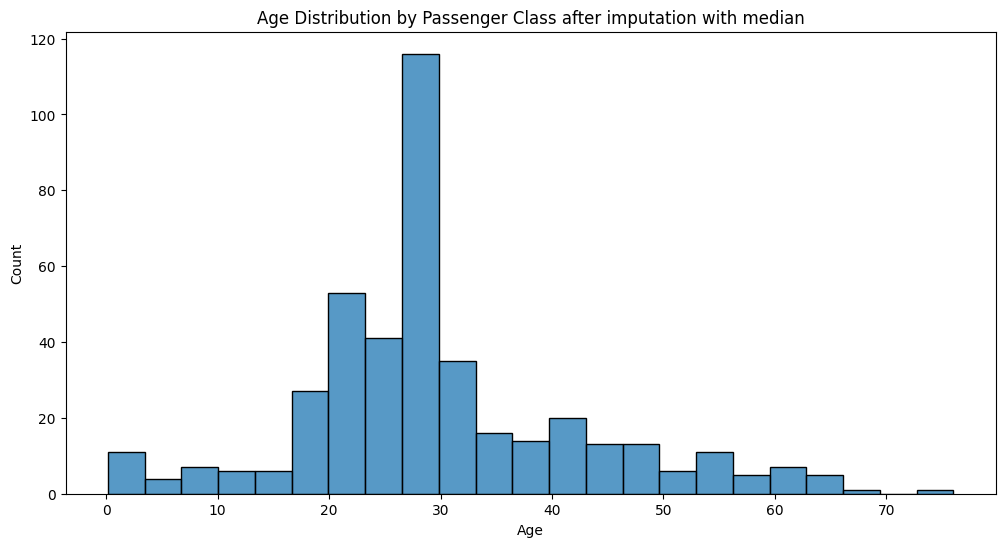

In [23]:
#plot Age distribution in test data after imputation
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=test_df)
plt.title('Age Distribution by Passenger Class after imputation with median' )
plt.show()
# We can also see that the age distribution is similar in both train and test data

In [24]:
# Now we can check the embarked column
print(train_df['Embarked'].isna().sum())
print(test_df['Embarked'].isna().sum())

2
0


In [25]:
#now we can check the embarked column
embard_group_byPclass = train_df.groupby('Pclass')['Embarked'].value_counts()
print(embard_group_byPclass)

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64


Text(0.5, 1.0, 'Embarked Distribution by Passenger Class')

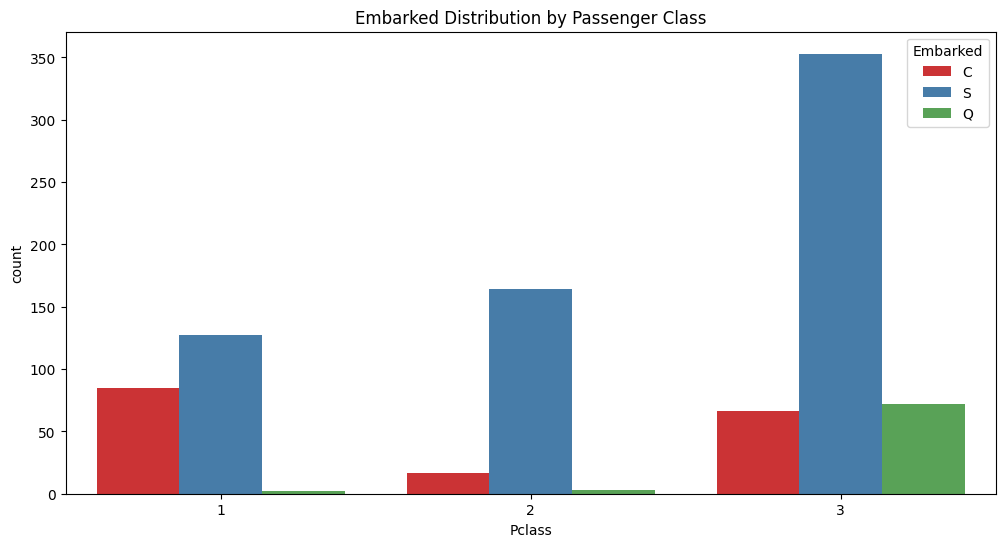

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=train_df, hue='Embarked', palette='Set1')
plt.title('Embarked Distribution by Passenger Class')

In [27]:
#fill embarked with the logical approach
def fill_embarked(row):
    if pd.isnull(row['Embarked']):
        if row['Pclass'] == 1:
            return 's'
        elif row['Pclass'] == 2:
            return 'S'
        elif row['Pclass'] == 3:
            return 'S'
    else:
        return row['Embarked']
train_df['Embarked'] = train_df.apply(fill_embarked, axis=1)
print(train_df['Embarked'].isna().sum())

0


In [28]:
# now we apply same logic to test data
test_df['Embarked'] = test_df.apply(fill_embarked, axis=1)
print(test_df['Embarked'].isna().sum())

0


In [29]:
print(train_df.isna().sum())
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [30]:
# fare column
print(train_df['Fare'].isna().sum())
print(test_df['Fare'].isna().sum())
print(train_df['Fare'].describe())
print(test_df['Fare'].describe())

0
1
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [31]:
test_df.loc[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [32]:
#check fare with respect to pclass and embarked plot

fare_group_byPclassEmbarked = train_df.groupby(['Pclass', 'Embarked'])['Fare'].mean()
print(fare_group_byPclassEmbarked)

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
        s            80.000000
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64


We Have onserved that these is a small mistake in the embarkked column as 's' come to consideration so we've changed it to 'S'

In [33]:
train_df['Embarked'] = train_df['Embarked'].str.replace('s','S')

In [34]:
fare_group_byPclassEmbarked = train_df.groupby(['Pclass', 'Embarked'])['Fare'].mean()
print(fare_group_byPclassEmbarked)

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.514244
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64


In [35]:
#check fare with respect to pclass and embarked plot

fare_group_byPclassEmbarked = test_df.groupby(['Pclass', 'Embarked'])['Fare'].mean()
print(fare_group_byPclassEmbarked)

Pclass  Embarked
1       C           110.073511
        Q            90.000000
        S            76.677504
2       C            20.120445
        Q            11.273950
        S            23.056090
3       C            10.658700
        Q             8.998985
        S            13.913030
Name: Fare, dtype: float64


In [36]:
# handle fare missing values in test data
def fill_fare(row):
    if pd.isnull(row['Fare']):
        if row['Pclass'] == 1 and row['Embarked'] == 'C':
            return 110.073
        elif row['Pclass'] == 1 and row['Embarked'] == 'Q':
            return 90.000
        elif row['Pclass'] == 1 and row['Embarked'] == 'S':
            return 76.677
        elif row['Pclass'] == 2 and row['Embarked'] == 'C':
            return 20.120
        elif row['Pclass'] == 2 and row['Embarked'] == 'Q':
            return 11.273
        elif row['Pclass'] == 2 and row['Embarked'] == 'S':
            return 23.056
        elif row['Pclass'] == 3 and row['Embarked'] == 'C':
            return 10.658
        elif row['Pclass'] == 3 and row['Embarked'] == 'Q':
            return 8.998
        elif row['Pclass'] == 3 and row['Embarked'] == 'S':
            return 13.913
    else:
        return row['Fare']
    
test_df['Fare'] = test_df.apply(fill_fare, axis=1)
print(test_df['Fare'].isna().sum())

0


## Adding columns 

In [37]:
# we will bin the age column into 5 bins and create a new column called AgeGroup
# AgeGroup: Child, Teenager, Adult, Middle Age, Senior
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
train_df['AgeGroup'].value_counts()

AgeGroup
Adult         562
Middle Age    128
Teenager      110
Child          69
Senior         22
Name: count, dtype: int64

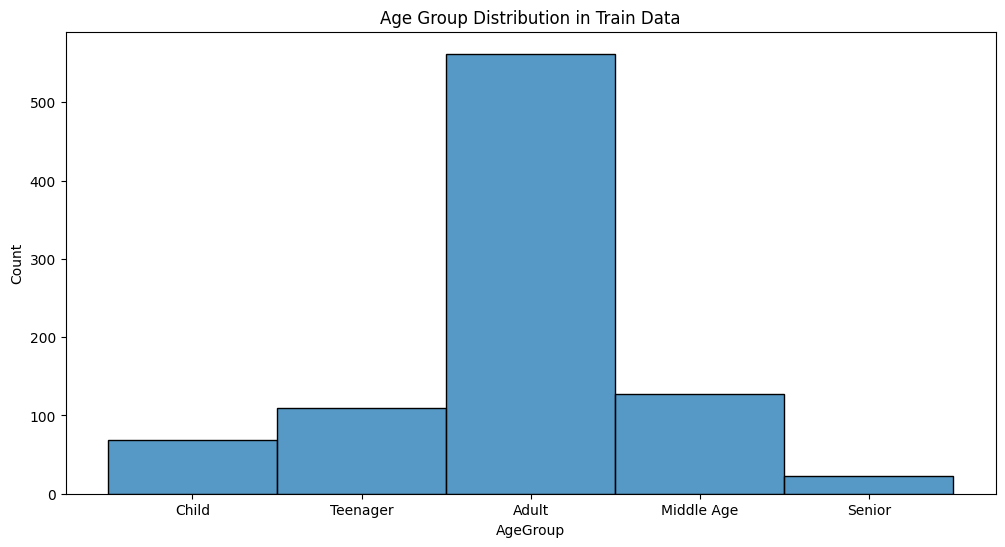

In [38]:
#plot AgeGroup distribution in train data
plt.figure(figsize=(12, 6))
sns.histplot(x='AgeGroup', data=train_df)
plt.title('Age Group Distribution in Train Data')
plt.show()

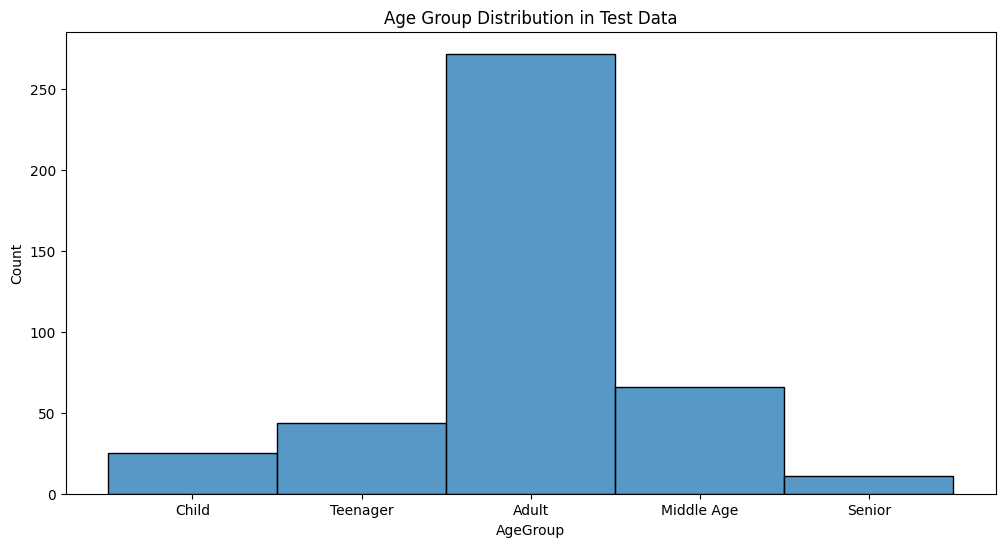

In [39]:
#similarly we can do the same for test data
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)
test_df['AgeGroup'].value_counts()
#plot AgeGroup distribution in test data
plt.figure(figsize=(12, 6))
sns.histplot(x='AgeGroup', data=test_df)
plt.title('Age Group Distribution in Test Data')
plt.show()

In [40]:
#FamilySize: FamilySize = SibSp + Parch + 1
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1


Text(0.5, 1.0, 'Family Size Distribution in Train Data')

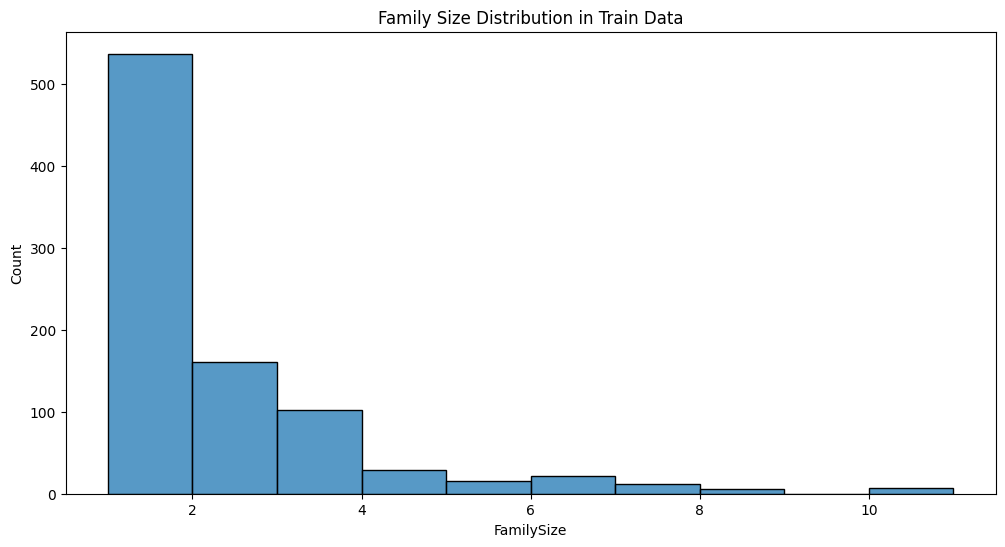

In [41]:
#plot FamilySize distribution in train data
plt.figure(figsize=(12, 6))
sns.histplot(x='FamilySize', data=train_df, bins=10)
plt.title('Family Size Distribution in Train Data')

In [42]:
train_df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

Text(0.5, 1.0, 'Family Size Distribution in Test Data')

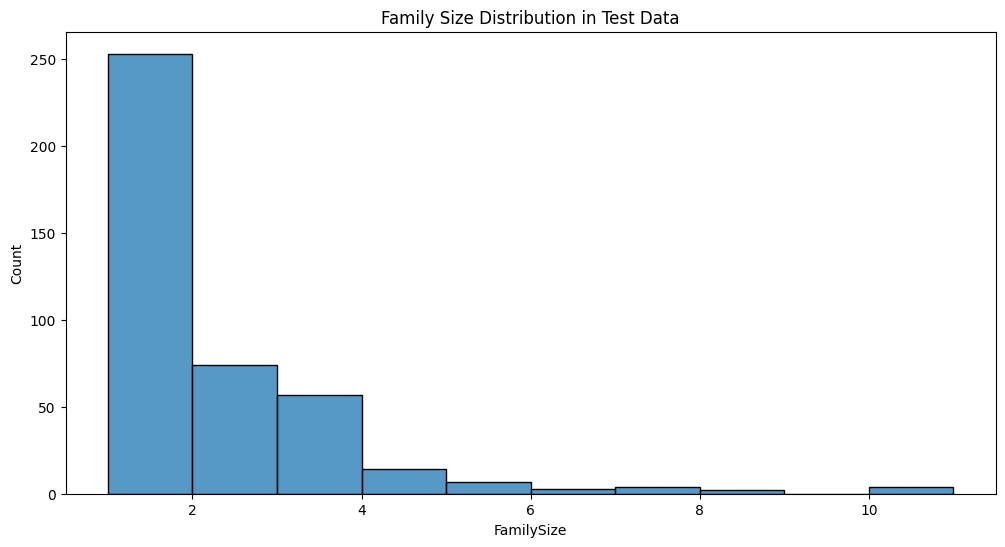

In [43]:
# similarly we can do the same for test data
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df.head()
#plot FamilySize distribution in test data
plt.figure(figsize=(12, 6))
sns.histplot(x='FamilySize', data=test_df, bins=10)
plt.title('Family Size Distribution in Test Data')

In [44]:
test_df['FamilySize'].value_counts()

FamilySize
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

## Data Analysis and Visualization
- Here we deal how oure target variable is related with all features in our data set


C:\Users\manik\AppData\Local\Temp\ipykernel_24876\3553298141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='Set1')


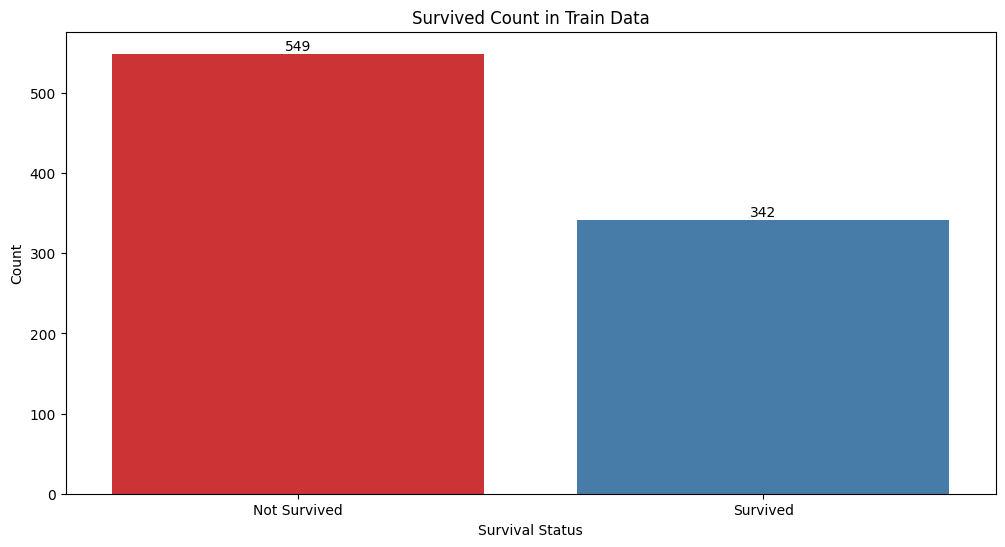

In [51]:
# survived count
train_df['Survived'].value_counts()
#plot survived count in train data
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Survived', data=train_df, palette='Set1')
for i in range(2):
    plt.text(i, train_df['Survived'].value_counts()[i], train_df['Survived'].value_counts()[i], ha='center', va='bottom')
plt.title('Survived Count in Train Data')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [57]:
# We will notice the gender column 
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

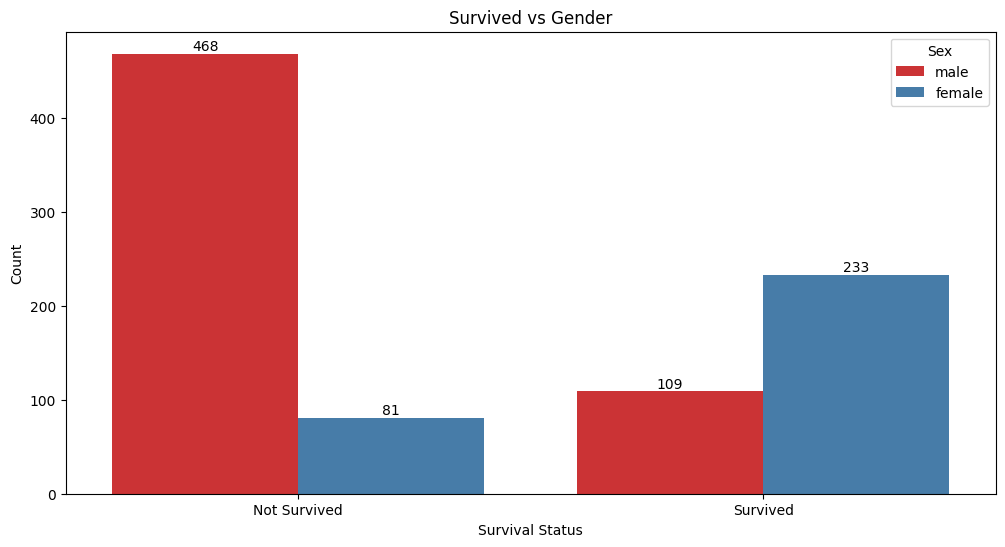

In [55]:
# Survived vs Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=train_df, hue='Sex', palette='Set1')
for i in range(2):
    count_male = train_df[(train_df['Survived'] == i) & (train_df['Sex'] == 'male')].shape[0]
    count_female = train_df[(train_df['Survived'] == i) & (train_df['Sex'] == 'female')].shape[0]
    plt.text(i - 0.2, count_male, str(count_male), ha='center', va='bottom')
    plt.text(i + 0.2, count_female, str(count_female), ha='center', va='bottom')
plt.title('Survived vs Gender')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

##
- Well we can learly see the survival rate of female is higher compared to men
- Well the not survival rate of male is dominating 5 times more than female

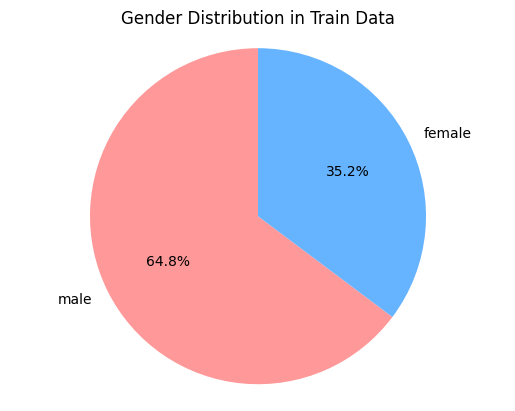

In [60]:
plt.pie(train_df['Sex'].value_counts(), labels=train_df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution in Train Data')
plt.show()

In [73]:
train_df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

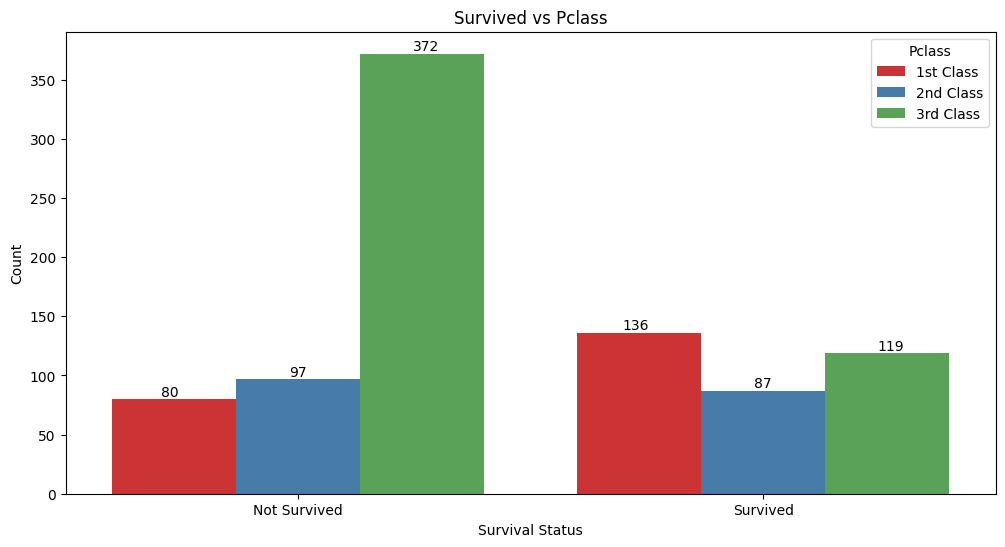

In [71]:
# Surivived vs Pclass
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=train_df, hue='Pclass', palette='Set1')
for i in range(2):
    count_1st = train_df[(train_df['Survived'] == i) & (train_df['Pclass'] == 1)].shape[0]
    count_2nd = train_df[(train_df['Survived'] == i) & (train_df['Pclass'] == 2)].shape[0]
    count_3rd = train_df[(train_df['Survived'] == i) & (train_df['Pclass'] == 3)].shape[0]
    plt.text(i - 0.275, count_1st, str(count_1st), ha='center', va='bottom')
    plt.text(i, count_2nd, str(count_2nd), ha='center', va='bottom')
    plt.text(i + 0.275, count_3rd, str(count_3rd), ha='center', va='bottom')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Pclass', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('Survived vs Pclass')
plt.show()

# 
- Passangers from 1st class have survived more than the other two classes, well 3rd class dominates 2nd class in survival.
- Coming to Not survival it is 3rd class which dominates 4times of the other two classes

In [77]:
# survived vs age group
train_df.groupby('AgeGroup')['Survived'].value_counts()

C:\Users\manik\AppData\Local\Temp\ipykernel_24876\522196305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('AgeGroup')['Survived'].value_counts()


AgeGroup    Survived
Child       1            40
            0            29
Teenager    0            68
            1            42
Adult       0           357
            1           205
Middle Age  0            78
            1            50
Senior      0            17
            1             5
Name: count, dtype: int64

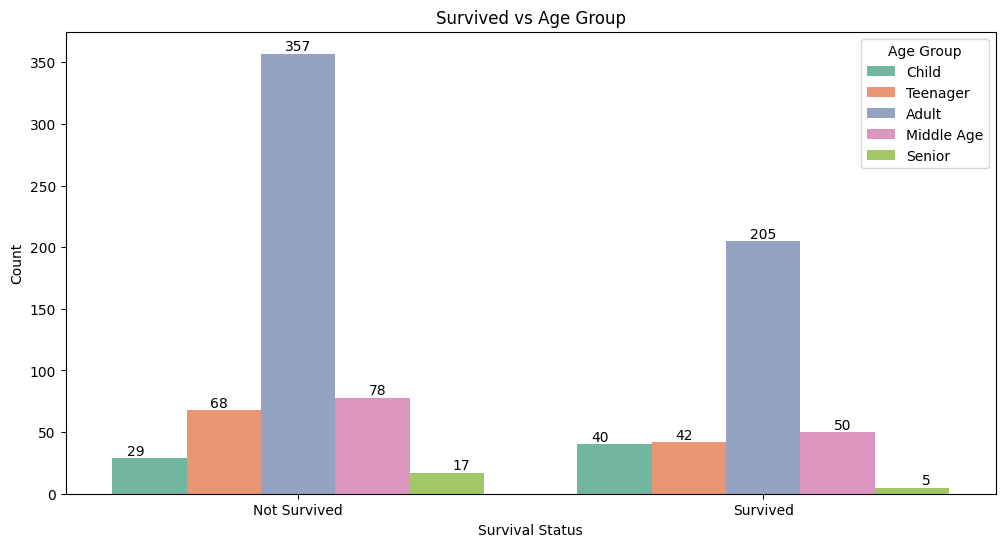

In [81]:
# survived vs age group
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=train_df, hue='AgeGroup', palette='Set2')
for i in range(2):
    count_child = train_df[(train_df['Survived'] == i) & (train_df['AgeGroup'] == 'Child')].shape[0]
    count_teenager = train_df[(train_df['Survived'] == i) & (train_df['AgeGroup'] == 'Teenager')].shape[0]
    count_adult = train_df[(train_df['Survived'] == i) & (train_df['AgeGroup'] == 'Adult')].shape[0]
    count_middle_age = train_df[(train_df['Survived'] == i) & (train_df['AgeGroup'] == 'Middle Age')].shape[0]
    count_senior = train_df[(train_df['Survived'] == i) & (train_df['AgeGroup'] == 'Senior')].shape[0]
    plt.text(i - 0.35, count_child, str(count_child), ha='center', va='bottom')
    plt.text(i - 0.17, count_teenager, str(count_teenager), ha='center', va='bottom')
    plt.text(i, count_adult, str(count_adult), ha='center', va='bottom')
    plt.text(i + 0.17, count_middle_age, str(count_middle_age), ha='center', va='bottom')
    plt.text(i + 0.35, count_senior, str(count_senior), ha='center', va='bottom')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Age Group', loc='upper right', labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])
plt.title('Survived vs Age Group')
plt.show()


#
- Well in both the survived and not survived the Adults are dominating where there range from age 20-40 

In [82]:
# survived vs age
train_df.groupby('Age')['Survived'].value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 142, dtype: int64

Text(0.5, 1.0, 'Survived vs Age Distribution')

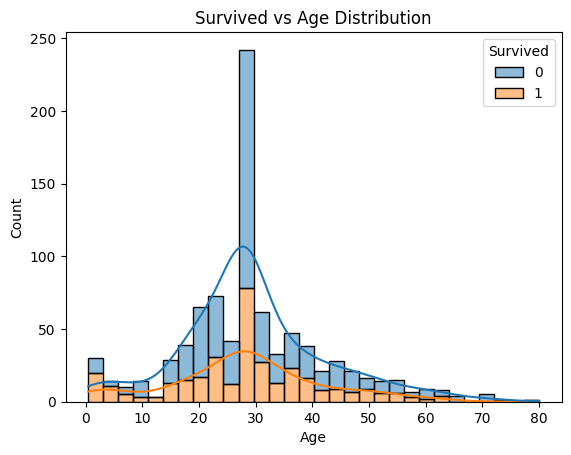

In [84]:
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Survived vs Age Distribution')

#
- If we dive deep into age groups we get that around 27-29 age group have both hihgest surivavl and not survival rates accordingly

In [85]:
# Survived vs fare
train_df.groupby('Fare')['Survived'].value_counts()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: count, Length: 330, dtype: int64

C:\Users\manik\AppData\Local\Temp\ipykernel_24876\1483767746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=train_df, palette='Set2')


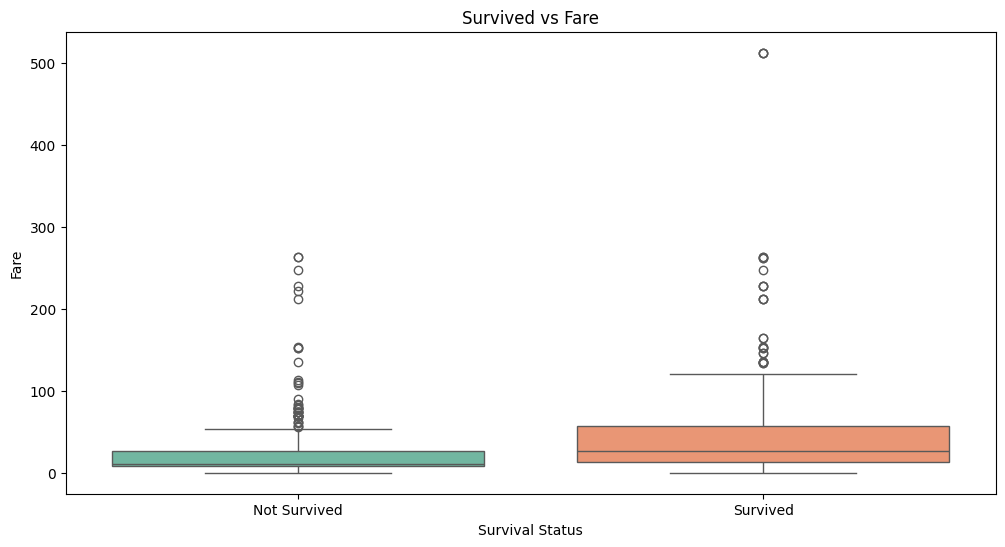

In [92]:
#survived vs fare
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df, palette='Set2')
plt.title('Survived vs Fare')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

#
- Well the people who've survived paid more fare compared to others and above pclass distribution we have clearly seen that hihgest class have more surivavl which direclt relates to the fare.

In [93]:
# Survived vs family size
train_df.groupby('FamilySize')['Survived'].value_counts()

FamilySize  Survived
1           0           374
            1           163
2           1            89
            0            72
3           1            59
            0            43
4           1            21
            0             8
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: count, dtype: int64

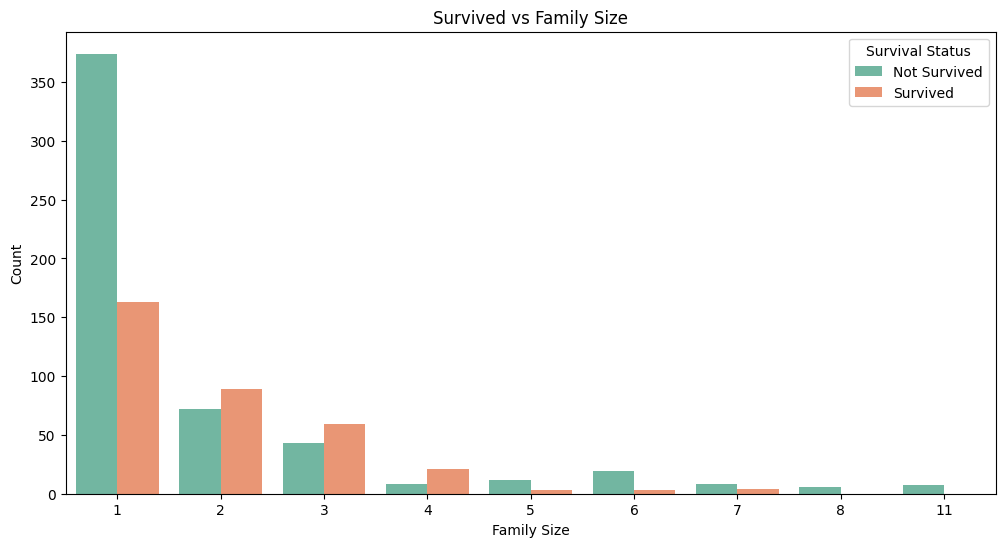

In [99]:
# survived vs family size
plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', data=train_df, hue='Survived', palette='Set2')
plt.title('Survived vs Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survival Status', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


#
- From the above visualization we are getting to know that small family size has more survival rate and more not survival rate as well

In [100]:
# survived vs embarked
train_df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

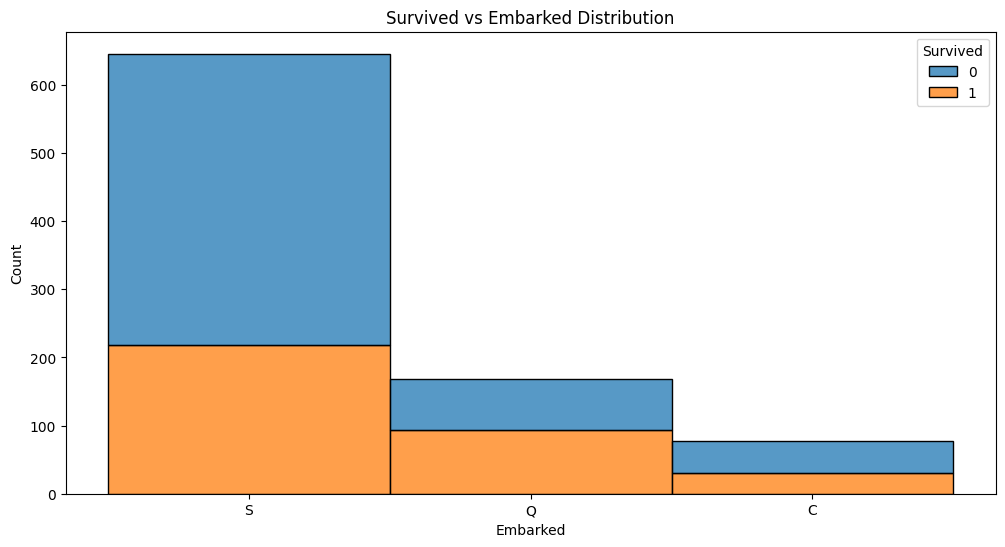

In [ ]:
# survived vs embarked
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Embarked', hue='Survived', multiple='stack', bins=30)
plt.title('Survived vs Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['S', 'Q', 'C'])
plt.show()


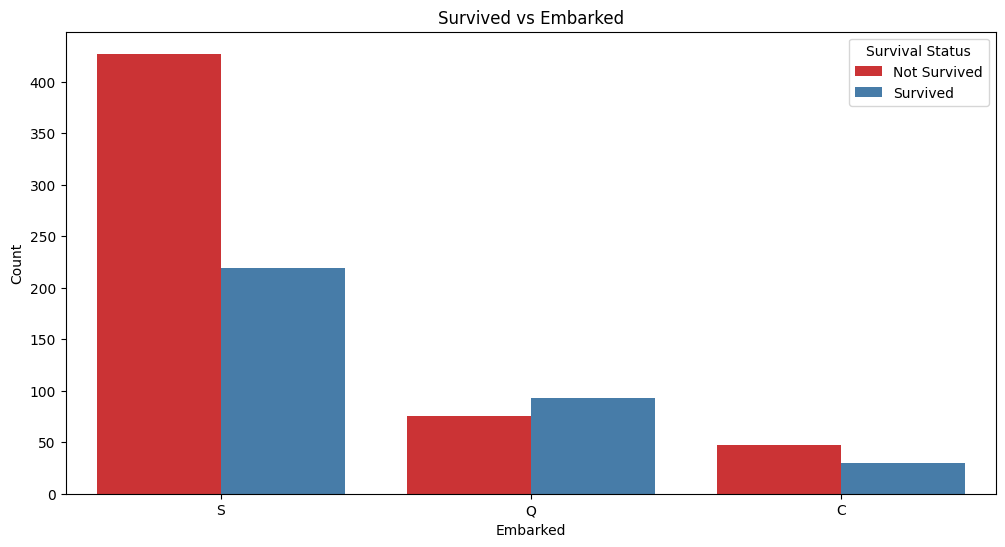

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', data=train_df, hue='Survived', palette='Set1')
plt.title('Survived vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['S', 'Q', 'C'])
plt.legend(title='Survival Status', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


#
- Southampton
- We can clearly come to conclusion that the surival rate of people from here is less than not survived

#
- Queenstown
- Here the survival rate of people from here is more than not survival rate.

#
- Cherbourg
- Here Not survival rate dominates over survival rate.

In [113]:
#correlation matrix for train data numeric columns
correlation_matrix = train_df[train_df.select_dtypes(include=[np.number]).columns].corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.245619  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.096688   -0.245619  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySiz

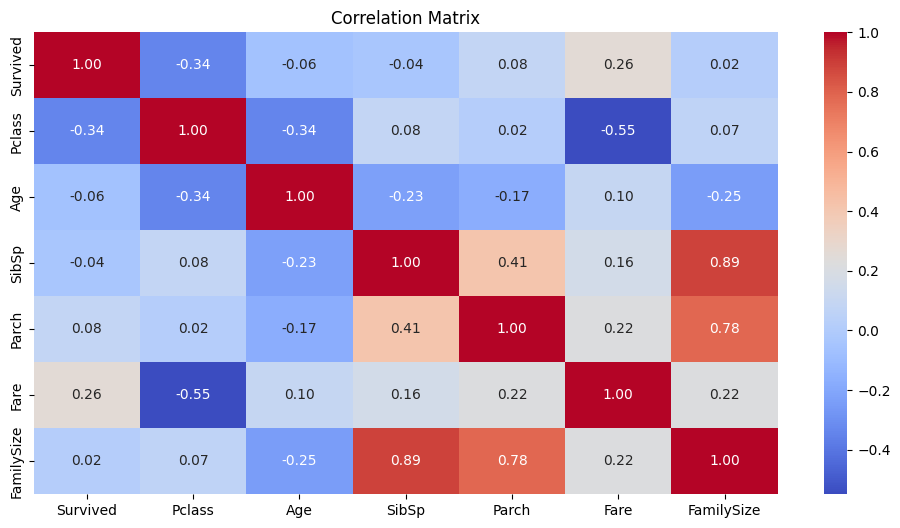

In [112]:
# Now we can check the correlation between the features
correlation_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()
#plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#
- There are hardly any correlations in the data. Have noticed negative correlation between the Fare and Pclass